### Sets
- A set is an unordered collection of items (referred to as elements) with no duplicates   
    - Sets can contain numbers, strings, tuples, and Boolean values  
    - Some examples of sets are {"spam", "ni"}, {3, 4, 7}  
    - Sets cannot contain lists or other sets  
    - Since the elements have no order, they cannot be indexed
        - Slicing and list methods such as sord and reverse are meaningless


- Useful set operations include membership test, subset test, intersection, and so on

In [3]:
bri = {'brazil', 'russia', 'india'}
\

print('india' in bri)
print('usa' in bri)
bric = bri.copy()
print(bric)
bric.add('china')
print(bric)
bri.remove('russia')   # or bri.discard('russia')
print(bri)
print(bric.issuperset(bri))   # or bri.issubset(bric)
print(bri & bric)   # or bri.intersection(bric)
print(bric.union(bri))

True
False
{'brazil', 'india', 'russia'}
{'china', 'brazil', 'india', 'russia'}
{'brazil', 'india'}
True
{'brazil', 'india'}
{'china', 'india', 'brazil', 'russia'}


- List, tuple, and set can be converted to one another by using the functions __list, tuple and set__.

In [7]:
words = ['nudge', 'nudge', 'wink', 'wink']
print(tuple(words))
terms = set(words)
print(terms)
print(list(terms))
alpha = ('a', 'b', 'c')
print(set(alpha))
terms.clear()
print(terms)

('nudge', 'nudge', 'wink', 'wink')
{'nudge', 'wink'}
['nudge', 'wink']
{'a', 'c', 'b'}
set()


- Although the elements of a set cannot be ordered, they can be placed into a list in a customized order using the __sorted__ function

In [9]:
bric = {'brazil', 'china', 'india', 'russia'}
print(bric)
sorted(bric)
sorted(bric, key=len, reverse=True)
print(bric)

{'china', 'brazil', 'india', 'russia'}
{'china', 'brazil', 'india', 'russia'}


- Like lists, sets can be created with comprehension

- The following is a rewrite of the example program on using set methods to create a file containing the names of presidents who also served as vice president

In [13]:
def main():
    ## Create a file of the presidents who also served
    # as vice-presidents.
    vicePresSet = createSetFromFile("VPres.txt")
    presSet = createSetFromFile("USPres.txt")
    bothPresAndVPresSet = createIntersection(vicePresSet, presSet)
    writeNamesToFile(bothPresAndVPresSet, "PresAndVPres.txt")

def createSetFromFile(fileName):
    # Assume that the last line of the file ends with
    # a newline character.
    infile = open(fileName, 'r')
    namesSet = {name for name in infile}
    infile.close()
    return namesSet

def createIntersection(set1, set2):
    return set1.intersection(set2)

def writeNamesToFile(setName, fileName):
    outfile = open(fileName, 'w')
    outfile.writelines(setName)
    outfile.close()

main()

- Set operations(words = {'spam', 'ni'})

![image](https://user-images.githubusercontent.com/61931924/96402940-179fec00-1212-11eb-9bc7-46c920047034.png)


In [18]:
print({1, 2, 3} | {3, 4}, # set uniou
    {1, 2, 3} & {3, 4}, # set intersection
    {1, 2, 3} - {3, 4}, # set difference
    {1, 2, 3} ^ {3, 4}, # symmetric difference
    3 in {1, 2, 3}) # is an element of
x = {1, 2, 3} - {3, 4}
print(x, end=" ")
x.add(5)
print(x,)
y = x.copy()
print(y, end=" ")
y.discard
print(y)

{1, 2, 3, 4} {3} {1, 2} {1, 2, 4} True
{1, 2} {1, 2, 5}
{1, 2, 5} {1, 2, 5}


### CSV Files
- Text files considered so far had a single piece of data per line
- Consider CSV(comma separated values) formatted file
     - several times of data on each line
     - Items separated by commas
- The file __UN.txt__ contains the members of UN
    - Countries listed in alphabetical order
    - Each record contains data about a country: name, continent, population (in million), land area(in square miles)

In [19]:
def main():
    ## Display the countries in a specified continent.
    continent = input("Enter the name of a continent: ")
    continent = continent.title()   # Allow for all lower
    if continent != "Antarctica":
        infile = open("UN.txt", 'r')
        for line in infile:
            data = line.split(',')
            if data[1] == continent:
                print(data[0])
    else:
        print("There are no countries in Antarctica.")
main()

Enter the name of a continent: South America
Argentina
Bolivia
Brazil
Chile
Colombia
Ecuador
Guyana
Paraguay
Peru
Suriname
Uruguay
Venezuela


### Analyzing the Data in a CSV File with a List
- Data can be analyzed by placing data into a list
    - Items of the list are other lists holding the contents of a single line of the file

In [21]:
def main():
    ## Create a file containing all countries and areas,
    ## ordered by area.
    ## Display first five lines of the file.
    countries = placeRecordsIntoList("UN.txt")
    countries.sort(key=lambda country: country[3], reverse=True)
    displayFiveLargestCountries(countries)
    createNewFile(countries)   # Create file of countries and their areas.
    
def placeRecordsIntoList(fileName):
    infile = open(fileName, 'r')
    listOfRecords = [line.rstrip() for line in infile]
    infile.close()
    for i in range(len(listOfRecords)):
        listOfRecords[i] = listOfRecords[i].split(',')
        listOfRecords[i][2] = eval(listOfRecords[i][2])   # population
        listOfRecords[i][3] = eval(listOfRecords[i][3])   # area
        
    return listOfRecords

def displayFiveLargestCountries(countries):
    print("{0:20}{1:9}".format("Country", "Area (sq. mi.)"))
    for i in range(5):
        print("{0:20}{1:9,d}".format(countries[i][0], countries[i][3]))
        
def createNewFile(countries):
    outfile = open("UNbyArea.txt", 'w')
    for country in countries:
        outfile.write(country[0] + ',' + str(country[3]) + "\n")
    outfile.close()
    
main()

Country             Area (sq. mi.)
Russian Federation  6,592,800
Canada              3,855,000
United States       3,794,066
China               3,696,100
Brazil              3,287,597


- The first three lines of the CSV file __UNbyArea.txt__ are
![image](https://user-images.githubusercontent.com/61931924/96403041-533ab600-1212-11eb-85ff-9a732120a203.png)


- CSV files can be converted to Excel spreadsheets
    - Open UN.txt file in Excel, select comma when asked for delimiter
- Spreadsheets can be converted to CSV files
    - Click on "Save As" from the FILE menu, choose "CSV(Comma delimited)" in the "Save as type" dropdown box

### Dictionary
- A dictionary is a collection of comma-separated pairs of the form
    d = {key1:value1, key2:valu2, ...}
    - The keys must be unique immutable objects(such as strings, numbers, or tuples)
    - The value associated with __key1__ is given by the expression d[key1]
    

- The __dict__ function convers a list of two-item lists or two-item tuples into a dictionary

In [27]:
list1 = [["one", 1], ["two", 2], ["three", 3]]
dict(list1)
list2 =[("one", 1), ("two", 2), ("three", 3)]
dict(list2)

addr = { 'Swaroop'    : 'swaroop@swaroopch.com',
          'Larry'     : 'larry@wall.org',
          'Matsumoto' : 'matz@ruby-lang.org',
          'Spammer'   : 'spammer@hotmail.com'}
print("Swaroop's address is", addr['Swaroop'])

# Deleting a key-value pair
del addr['Spammer']
print('\nThere are {} contacts in the address-book\n' \
     .format(len(addr)))

for name, address in list(addr.items()):
    print('Contact {} at {}'.format(name, address))
    
# Adding a key-value pair
addr["Guido"] = 'guido@python.org'
if 'Guido' in addr:
    print("\nGuido's address is", addr['Guido'])

Swaroop's address is swaroop@swaroopch.com

There are 3 contacts in the address-book

Contact Swaroop at swaroop@swaroopch.com
Contact Larry at larry@wall.org
Contact Matsumoto at matz@ruby-lang.org

Guido's address is guido@python.org


- The operation list(d.items()) returns a list of tuples where each tuple contains a key value pair
- New key-value pairs can be added by simply using the indexing operator to access a key and assign its value
- Dictionary operations:  
    ![image](https://user-images.githubusercontent.com/61931924/96402971-2be3e900-1212-11eb-9b86-9ca15ec02ec9.png)
    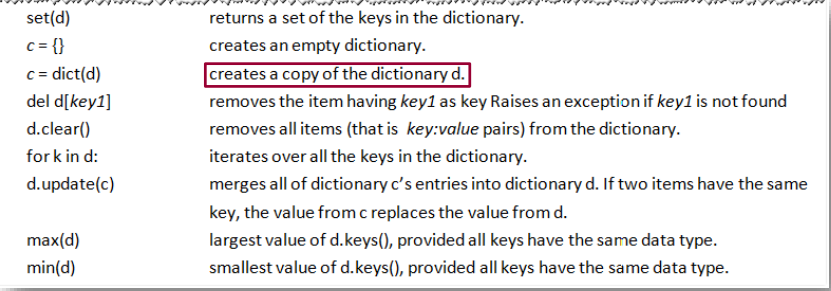

### Using a Dictionary to Simplify a Long if-elif
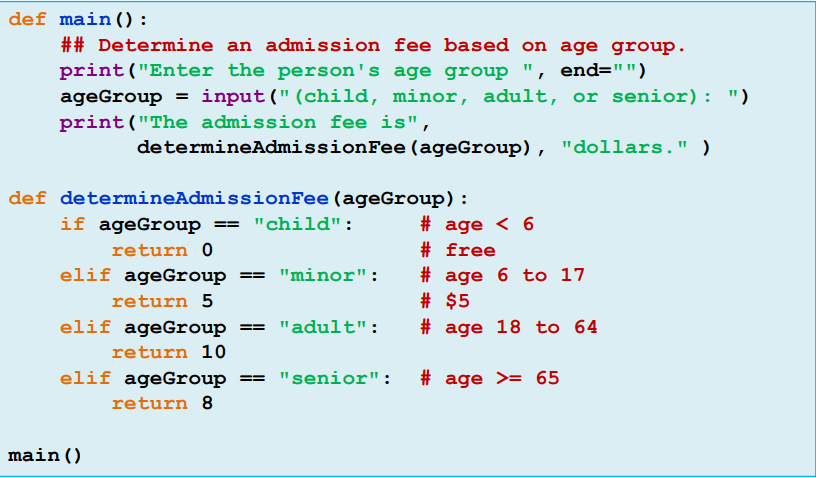

In [1]:
def main():
    ## Determine an admission fee based on age grop.
    print("Enter the person's age group ", end="")
    ageGroup = input("(child, minor, adult, or senior): ")
    print("The admission fee is", determineAdmissionFee(ageGroup), "dollars.")
    
def determineAdmissionFee(ageGroup):
    if ageGroup == "child":
        return 0
    elif ageGroup == "minor":
        return 5
    elif ageGroup == "adult":
        return 10
    elif ageGroup == "senior":
        return 8

main()

Enter the person's age group (child, minor, adult, or senior): child
The admission fee is 0 dollars.


- The rewrite of determineAdmissionFee function below, replaces the if-elif statement with a discionary

![image](https://user-images.githubusercontent.com/61931924/96403199-a90f5e00-1212-11eb-937a-e4389c27bbf8.png)

In [2]:
def main():
    ## Determine an admission fee based on age grop.
    print("Enter the person's age group ", end="")
    ageGroup = input("(child, minor, adult, or senior): ")
    print("The admission fee is", determineAdmissionFee(ageGroup), "dollars.")
    
def determineAdmissionFee(ageGroup):
    dict = {"child":0, "minor":5, "adult":10, "senior":8}
    return dict[ageGroup]

main()

Enter the person's age group (child, minor, adult, or senior): child
The admission fee is 0 dollars.


### Using a Dictionary as a Frequency table

In [9]:
def main():
    ## Analyze word frequencies in the Gettysburg Address, which is written in a single line.
    listOfWords = formListOfWords("data/Gettysburg.txt")
    freq = createFrequencyDictionary(listOfWords)
    displayWordCount(listOfWords, freq)
    displayMostCommonWords(freq)
    
def formListOfWords(fileName):
    infile = open(fileName)
    originalLine = infile.readline().lower()
    # Remove punctuation marks from the line.
    line = ""
    for ch in originalLine:
        if ('a' <= ch <= 'z') or (ch == ""):
            line += ch
    # Place the individual words into a list.
    listOfWords = line.split()
    return listOfWords

def createFrequencyDictionary(listOfWords):
    ## Create dictionary with each item having the form
    ## word: word frequency.
    freq = {}
    for word in listOfWords:
        freq[word] = 0
    for word in listOfWords:
        freq[word] = freq[word] + 1
    return freq

def displayWordCount(listOfWords, freq):
    print("The Gettysburg Address contains", len(listOfWords), "words.")
    print("The Gettysburg Address contains", len(freq), "different words.")
    print()

def displayMostCommonWords(freq):
    ## Common words are those with frequency > 5.
    print("The most common words and their frequencies are:")
    listOfMostCommonWords = []
    for word in freq.keys():
        if freq[word] >= 6:
            listOfMostCommonWords.append((word, freq[word]))
    listOfMostCommonWords.sort(key=lambda x: x[1], reverse=True)
    for item in listOfMostCommonWords:
        print("   ", item[0] + ":", item[1])

main()

The Gettysburg Address contains 1 words.
The Gettysburg Address contains 1 different words.

The most common words and their frequencies are:


###  Sorting Dictionaries in Binary Files
- Methods that store dictionaries to, and retrieve dictionaries from binary files must be imported from a module named pickle 
    - Binary format can only be accessed by special readers

In [31]:
import pickle

outfile = open("Binary File.txt", 'wb')
pickle.dump(addr, outfile)                  # 위에서 addr을 썼다.
outfile.close()

infile = open("Binary File.txt", 'rb')
addr2 = pickle.load(infile)
infile.close()

print(addr2)

{'Swaroop': 'swaroop@swaroopch.com', 'Larry': 'larry@wall.org', 'Matsumoto': 'matz@ruby-lang.org', 'Guido': 'guido@python.org'}


- Dictoinary's values can be any type of object of object including a dictionary

In [13]:
import pickle

def main():
    ## Display countries (and their population) from a specified continent.
    nations = getDictionary("data/UNdict.dat")
    print("Enter the name of a continent", end="")
    continent = input("other than Antarctica: ")
    continentDict = constructContinentNations(nations, continent)
    displaySortedResults(continentDict)
    
def getDictionary(fileName):
    infile = open(fileName, 'rb')
    countries = pickle.load(infile)
    infile.close()
    return countries

def constructContinentNations(nations, continent):
    ## Reduce the full 193 item dictionary to a dictionary consisting solely of the countries in the specified continent.
    continentDict = {}
    for nation in nations:
        if nations[nation]["cont"] == continent:
            continentDict[nation] = nations[nation]
    return continentDict

def displaySortedResults(dictionaryName):
    ## Display countries in descending order by population.
    continentList = sorted(dictionaryName.items(), key=lambda k: k[1]["popl"], reverse=True)
    for k in continentList:
        print("   {0:s}:  {1:,.2f}".format(k[0], k[1]["popl"]))

main()

Enter the name of a continentother than Antarctica: Europe
   Russian Federation:  142.50
   Germany:  81.00
   United Kingdom:  66.70
   France:  66.30
   Italy:  61.70
   Spain:  47.70
   Ukraine:  44.30
   Poland:  38.30
   Romania:  21.70
   Netherlands:  16.59
   Greece:  11.80
   Portugal:  10.90
   Czech Republic:  10.60
   Belgium:  10.40
   Hungary:  10.00
   Sweden:  9.70
   Belarus:  9.60
   Austria:  8.20
   Switzerland:  8.10
   Serbia:  7.20
   Bulgaria:  6.90
   Denmark:  5.60
   Slovakia:  5.40
   Finland:  5.30
   Norway:  5.10
   Ireland:  4.80
   Croatia:  4.50
   Bosnia and Herzegovina:  3.90
   Republic of Moldova:  3.60
   Lithuania:  3.50
   Albania:  3.00
   Latvia:  2.20
   The former Yugoslav Republic of Macedonia:  2.10
   Slovenia:  2.00
   Estonia:  1.30
   Montenegro:  0.65
   Luxembourg:  0.52
   Malta:  0.41
   Iceland:  0.32
   Andorra:  0.09
   Liechtenstein:  0.04
   San Marino:  0.03
   Monaco:  0.03


In [21]:
import pickle

def main():
    ## Displays the presidents from the given state ordered alphabetically by thier last names.
    presDict = createDictFromBinaryFile("data/USpresStatesDict.dat")
    state = getState(presDict)
    displayOutput(state, presDict)
    
def createDictFromBinaryFile(fileName):
    infile = open(fileName, 'rb')
    dictionary = pickle.load(infile)
    infile.close()
    return dictionary

def getState(dictName):
    state = input("Enter the naem of a state: ")
    if state in dictName.values():
        return state
    else:
        return "There are no presients from " + state + '.'
                
def displayOutput(state, dictName):
    if state.startswith("There"):
        print(state)
    else:
        print("Presdents from", state + ":")
        for pres in sorted(dictName):   # in sorted list of names
            if dictName[pres] == state:
                print(" " + pres[1] + " " + pres[0])
                
main()

Enter the naem of a state: Virginia
Presdents from Virginia:
 Thomas Jefferson
 James Madison
 James Monroe
 John Tyler
 George Washington


### Dictionary Comprehension

- Dictionaries can be created with dictionary comprehension, e.g.,  
    {x: x * x for in range(4)}
- Dictionary comprehension can be used to extract a subset of a dictionary, e.g.,  
    NE = {"Maine", "Connecticut", "New Hampshire", "Massachusetts", "Vermont", Rhode Island"}
    subSet = {key: presDict{key} for in presDict if presDict[key] in NE}